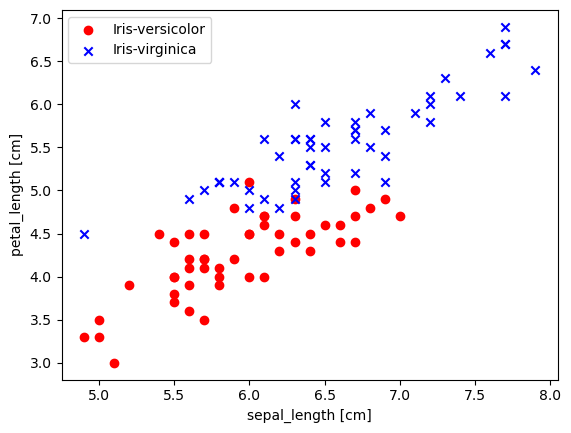

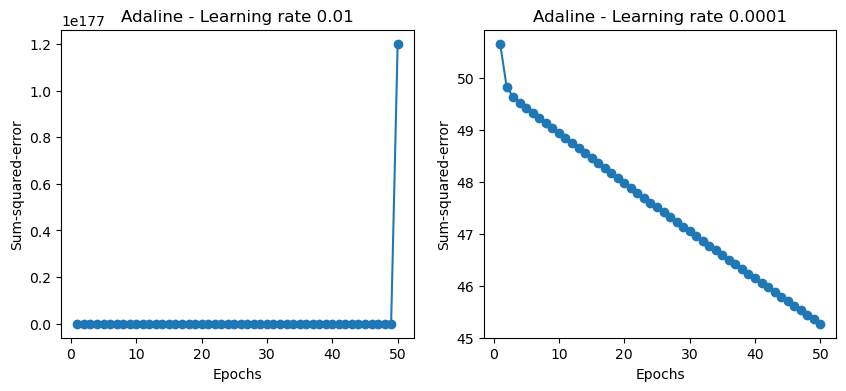

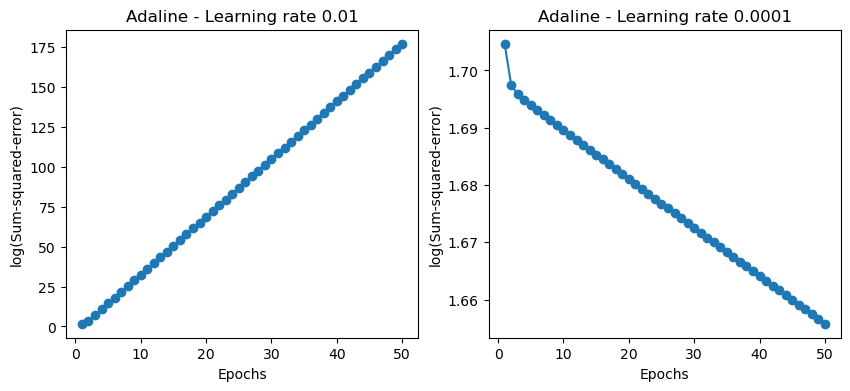

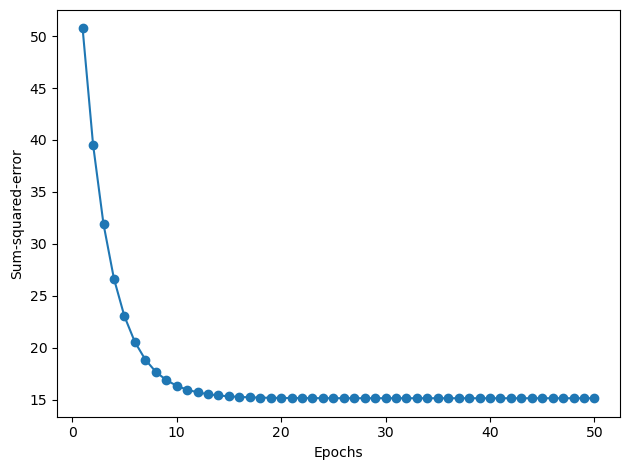

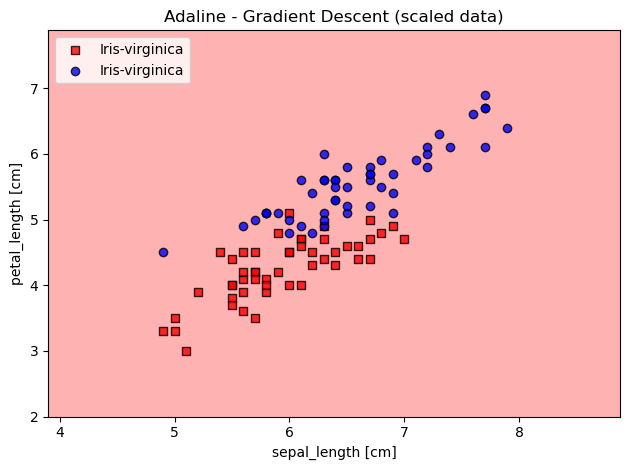

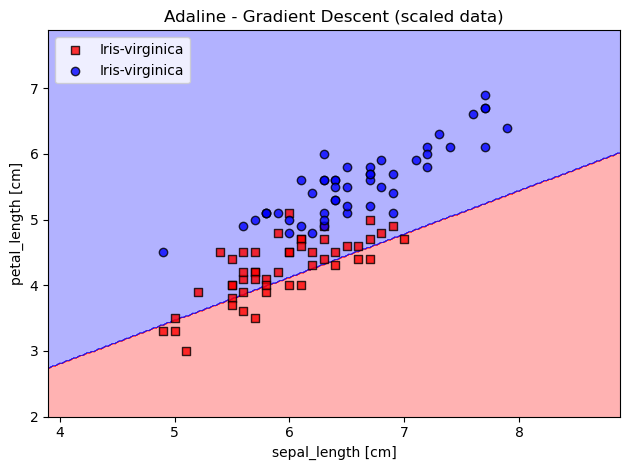

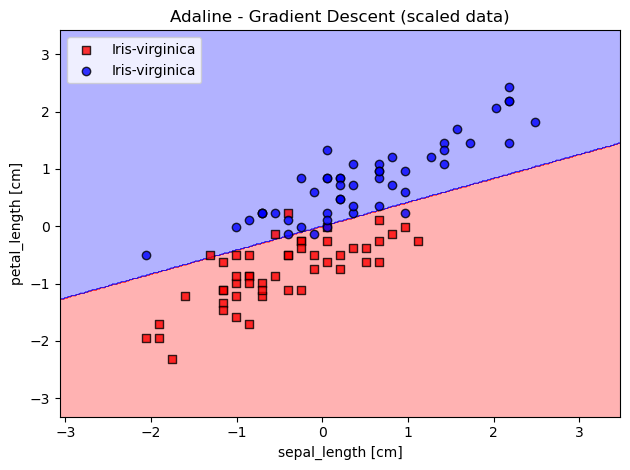

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parametros
    ------------
    eta : float
      Learning rate (entre 0.0 y 1.0)
    n_iter : int
      Cantidad de épocas de entrenamiento.
    random_state : int
      Semilla para generar pesos aleatorios.
    Atributos
    -----------
    w_ : 1d-array
      Vector de pesos al término del entrenamiento.
    cost_ : list
      Valor de la función de costo en cada época.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Entrenamiento.
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Vector de entrenamiento, donde n_samples es el número de muestras y 
          n_features es el número de características.
        y : array-like, shape = [n_samples]
          Valor de salida (etiquetas).
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcular entrada neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Calcular activación lineal"""
        return X

    def predict(self, X):
        """Etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, encoding='utf-8')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head(5)
df.tail(5)
df.iloc[45:55, :]
df.loc[95:106]
df.describe(include='all')

y = df.iloc[50:, 4].values
name_clases = list(np.unique(y))
y_numeric = np.where(y == name_clases[0], -1, 1)
X = df.iloc[50:, [0, 2]].values
variable_names = list(df.columns[[0, 2]])

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label=name_clases[0])
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label=name_clases[1])
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=50, eta=0.01).fit(X, y_numeric)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y_numeric)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=50, eta=0.01).fit(X, y_numeric)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y_numeric)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

def plot_decision_regions(X, y, classifier, clases_names=['clase 0', 'clase 1'], resolution=0.02):
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        if cl == -1:
            label = clases_names[0]
        else:
            label = clases_names[1]
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=label, edgecolor='black')

ada3 = AdalineGD(n_iter=50, eta=0.01)
ada3.fit(X_std, y_numeric)
plt.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

plot_decision_regions(X, y, classifier=ada1, clases_names=name_clases)
plt.title('Adaline - Gradient Descent (scaled data)')
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X, y, classifier=ada2, clases_names=name_clases)
plt.title('Adaline - Gradient Descent (scaled data)')
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_std, y, classifier=ada3, clases_names=name_clases)
plt.title('Adaline - Gradient Descent (scaled data)')
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()